In [52]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

In [36]:
def check_mans(df, days):
    # количество мужчин с пропуском более days дней
    A = len(df[(df['gender'] == 'М') & (df['work_days'] > days)])
    # количество мужчин с пропуском менее days дней
    B = len(df[(df['gender'] == 'М') & (df['work_days'] <= days)])
    # количество женщин с пропуском более days дней
    C = len(df[(df['gender'] == 'Ж') & (df['work_days'] > days)])
    # количество женщин с пропуском менее days дней
    D = len(df[(df['gender'] == 'Ж') & (df['work_days'] <= days)])

    count = np.array([A, C])
    nobs = np.array([A + B, C + D])
    stat, pval = proportions_ztest(count, nobs, alternative='larger')

    fig, axs = plt.subplots(1, 3, figsize=[10, 5], sharex=True, sharey=True)
    axs[0].hist(df.gender[df.work_days <= days], bins=3)
    axs[0].set_title(f"Пропустило {days} и менее дней")
    axs[1].hist(df.gender, bins=3)
    axs[1].set_title(f"Общее соотношение М\Ж")
    axs[2].hist(df.gender[df.work_days > days], bins=3)
    axs[2].set_title(f"Пропустило более{days}")

    if pval > 0.05:
        text = f'Т.к. P-значение равно {pval:.4f}, то мы не можем отклонить нулевую гипотезу и делаем вывод, что нет значимой разницы в частоте пропуска более {days} рабочих дней по болезни между мужчинами и женщинами.'
    else:
        text = f'Т.к. P-значение равно {pval:.4f}, то мы отклоняем нулевую гипотезу и делаем вывод, что действительно Мужчины пропускают более {days}  рабочих дней по болезни в течение года значимо чаще, чем женщины.'
    return text, fig


In [30]:
def check_age(df, days, age):
    # количество работников старше age с пропуском более days дней
    A = len(df[df.age_category == f'>{age}'][df['work_days'] > days])
    # количество работников старше age с пропуском менее days дней
    B = len(df[df.age_category == f'>{age}'][df['work_days'] <= days])
    # количество работников младше age пропуском более days дней
    C = len(df[df.age_category == f'<={age}'][df['work_days'] > days])
    # количество работников младше age с пропуском менее days дней
    D = len(df[df.age_category == f'<={age}'][df['work_days'] <= days])

    fig, axs = plt.subplots(1, 3, figsize=[10, 5], sharex=True, sharey=True)
    axs[0].hist(df.age_category[df.work_days <= days], bins=3)
    axs[0].set_title(f"Пропустило {days} и менее дней")
    axs[1].hist(df.age_category, bins=3)
    axs[1].set_title(f"Общее соотношение категорий")
    axs[2].hist(df.age_category[df.work_days > days], bins=3)
    axs[2].set_title(f"Пропустило более{days}")

    count = np.array([A, C])
    nobs = np.array([A + B, C + D])
    stat, pval = proportions_ztest(count, nobs, alternative='larger')

    if pval > 0.05:
        text = f'Т.к. p-значение равно {pval:.4f}, то не мы можем отклонить нулевую гипотезу и делаем вывод, что нет значимой разницы в частоте пропуска более {days} рабочих дней между заданными категориями возрастов.'
    else:
        text = f'Т.к. p-значение равно {pval:.4f}, то мы отклоняем нулевую гипотезу и делаем вывод, что действительно Работники старше {age} пропускают  в течение года более {days}  рабочих дней  значимо чаще своих более молодых коллег'
    return text, fig


In [31]:
df= pd.read_csv('Статистика.csv', encoding = "cp1251")

In [32]:
df = df.rename(columns={'Количество больничных дней': 'work_days',
                        'Возраст': 'age',
                        'Пол':'gender'})

Text(0, 0.5, 'Количество людей')

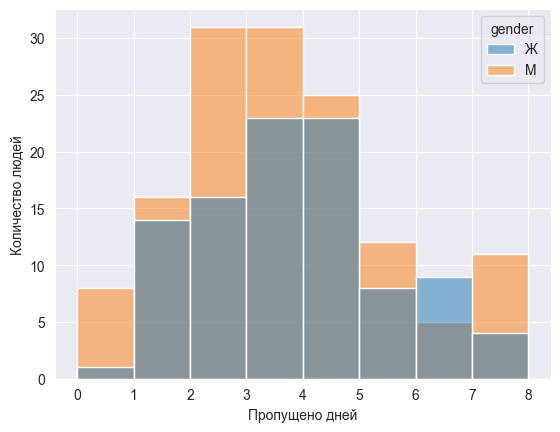

In [33]:
df = df.rename(columns={'Количество больничных дней': 'work_days',
                            'Возраст': 'age',
                            'Пол': 'gender'})
#days= int(input('Введите количество дней'))
days=2
#age = int(input('Введите возраст'))
age=35

# Определим категории возрастов
bins = [0, age, 100]
labels = [f'<={age}', f'>{age}']
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels)

mans = len(df[df.gender == 'М'])
women = len(df[df.gender == 'Ж'])
women_pass_N_days = len(df[(df['work_days'] > days) & (df.gender == 'Ж')])
mans_pass_N_days = len(df[(df['work_days'] > days) & (df.gender == 'М')])

less_age = len(df[df.age_category == f'<={age}'])
more_age = len(df[df.age_category == f'>{age}'])
lees_pass_N_days = len(df[(df['work_days'] > days) & (df.age_category == f'<={age}')])
more_pass_N_days = len(df[(df['work_days'] > days) & (df.age_category == f'>{age}')])

fig, ax = plt.subplots()
sns.histplot(data=df, x='work_days', hue='gender', bins=max(df.work_days), ax=ax)
plt.xlabel('Пропущено дней')
plt.ylabel('Количество людей')


Гипотеза 1.


Мужчины пропускают в течение года более 2 (или любое другое введеное количество)

 рабочих дней по болезни значимо чаще женщин.


Т.к. P-значение равно 0.8946, то мы не можем отклонить нулевую гипотезу и делаем вывод, что нет значимой разницы в частоте пропуска более 2 рабочих дней по болезни между мужчинами и женщинами.
Мужчины
Всего : 139 из 237  (58.65%)
84 (60.43%) пропустило более 2 дней
Женщины
Всего : 98 из 237  (41.35%)
67 (68.37%) пропустило более 2 дней


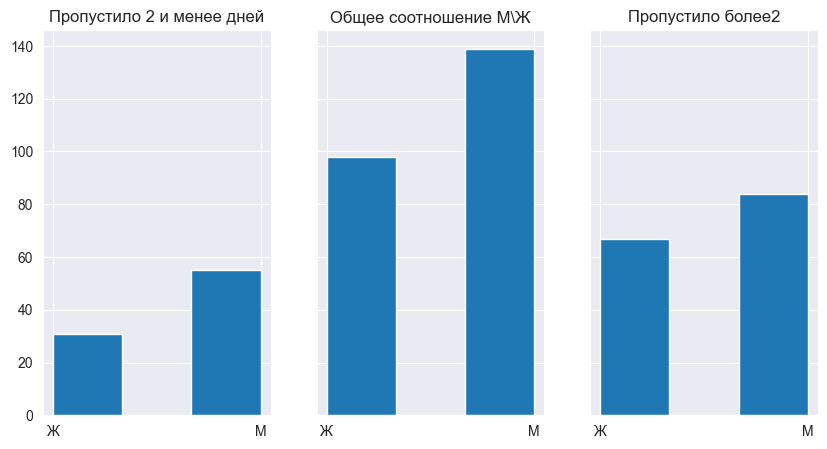

In [47]:
print(check_mans(df, days)[0])

print("Мужчины\n"
f"Всего : {mans} из {mans + women}  ({mans / (mans + women) * 100:.2f}%)\n"
f'{mans_pass_N_days} ({mans_pass_N_days / mans * 100:.2f}%) пропустило более {days} дней')

print("Женщины\n"
f"Всего : {women} из {mans + women}  ({round(women / (mans + women) * 100, 2)}%)\n"
f'{women_pass_N_days} ({women_pass_N_days / women * 100:.2f}%) пропустило более {days} дней')

Гипотеза 2.


Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней

(work_days) по болезни значимо чаще своих более молодых коллег.


C:\Users\User-pc\AppData\Local\Temp\ipykernel_62324\2499215461.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  A = len(df[df.age_category == f'>{age}'][df['work_days'] > days])
C:\Users\User-pc\AppData\Local\Temp\ipykernel_62324\2499215461.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  B = len(df[df.age_category == f'>{age}'][df['work_days'] <= days])
C:\Users\User-pc\AppData\Local\Temp\ipykernel_62324\2499215461.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  C = len(df[df.age_category == f'<={age}'][df['work_days'] > days])
C:\Users\User-pc\AppData\Local\Temp\ipykernel_62324\2499215461.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  D = len(df[df.age_category == f'<={age}'][df['work_days'] <= days])


Т.к. p-значение равно 0.4602, то не мы можем отклонить нулевую гипотезу и делаем вывод, что нет значимой разницы в частоте пропуска более 2 рабочих дней между заданными категориями возрастов.
возраст 35 и менее
Всего : 57 из 237  (24.05%)
36 (63.16%) пропустило более 2 дней
возраст более 35 
Всего : 180 из 237  (75.95%)
115 (63.89%) пропустило более 2 дней


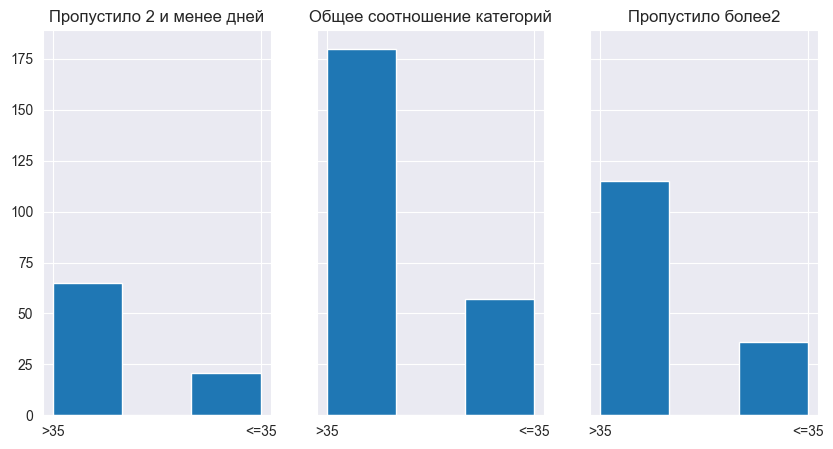

In [51]:
print(check_age(df, days, age)[0])
print(f"возраст {age} и менее\n"
f"Всего : {less_age} из {less_age + more_age}  ({less_age / (less_age + more_age) * 100:.2f}%)\n"
f'{lees_pass_N_days} ({lees_pass_N_days / less_age * 100:.2f}%) пропустило более {days} дней')
print(f"возраст более {age} \n"
f"Всего : {more_age} из {less_age + more_age}  ({more_age / (less_age + more_age) * 100:.2f}%)\n"
f'{more_pass_N_days} ({more_pass_N_days / more_age * 100:.2f}%) пропустило более {days} дней')